# Network Diagram of Twitter Users During Power Outages

> Author: [Yalim Demirkesen](github.com/demirkeseny)

Packages used:
- pandas 0.23.4
- matplotlib 3.0.2
- regex 2018.11.22
- string 0.1.2
- numpy 1.15.4
- networkx 2.2
- bokeh 1.0.1

Resources: 

- https://python-graph-gallery.com/network-chart/
- https://networkx.github.io/documentation/stable/reference/drawing.html#
- https://www.rapidtables.com/web/color/RGB_Color.html#color-table
- https://bokeh.pydata.org/en/latest/docs/user_guide/examples/graph_node_and_edge_attributes.html

In this notebook, I analyzed the interactions between the twitter users in and outside of the power outage times. 

In [1]:
%matplotlib inline

In [2]:
# Necessary libraries
import pandas as pd
import regex as re
import string
import numpy as np

In [3]:
# Downloading the dataset:
tweets = pd.read_csv('./data/combined_tweets_outages.csv')

In [4]:
# Changing the names of the columns to understand from which 
# account the tweet comes from and to where it goes.
tweets = tweets.rename(index=str, columns={'user':'from'})

In [5]:
# Creating an empty 'to' column to indicate the destinations of the nodes:
tweets['to'] = ''

In [6]:
# Reorganizing the columns according to the column names
tweets = tweets[['timestamp', 'id', 'text', 'from', 'to', 'outage' ,'likes', 'replies', 'retweets', 'query']]

In [7]:
tweets.head()

,timestamp,id,text,from,to,outage,likes,replies,retweets,query
0,2012-11-01 23:50:22,264152432282578945,"Tom May, CEO of Northeast Utilities, the paren...",EversourceMA,,1,1,1.0,3,EversourceMA OR EversourceNH OR VelcoVT OR nat...
1,2012-11-01 23:45:13,264151136792109056,@NYGovCuomo @lipanews @nationalgridus @nyseand...,readyforthenet,,1,0,0.0,0,EversourceMA OR EversourceNH OR VelcoVT OR nat...
2,2012-11-01 23:34:44,264148498352590849,Some amazing video from the Wareham microburst...,EversourceMA,,1,1,0.0,1,EversourceMA OR EversourceNH OR VelcoVT OR nat...
3,2012-11-01 23:34:20,264148399190851584,@nationalgridus Call me if you need some help ...,sparky1000,,1,0,0.0,0,EversourceMA OR EversourceNH OR VelcoVT OR nat...
4,2012-11-01 23:31:56,264147793147490304,Current PSNH statewide w/o power: 885. We're d...,EversourceNH,,1,0,1.0,8,EversourceMA OR EversourceNH OR VelcoVT OR nat...


In [8]:
# Since we will use the tweet post to understand the destination, I copied to that to
# 'to' column which will be replaced with the destination
tweets.to = tweets.text

In [9]:
# An empty list is created by appending all the posts to a single list
# at the end we have a big list of lists
tweets_lst = []
for i in range(0,len(tweets)):
    somelst=[]
    somelst.append(tweets['to'][i])
    tweets_lst.append(somelst)    

In [10]:
# Since in the Twitter, you need to use '@' to mention some other account,
# if we can grab all the string having that symbol, we can understand the destinations

import itertools

# An empty list is created to append the destionations
# This list is updated for each row and assigned to the 'to' column for that specific row.
mentions = []

for j in range(0, len(tweets_lst)):

    nested_list = tweets_lst[j:(j+1)] # nested list is the single tweet as a single list in a list
    flat_list = list(itertools.chain.from_iterable(nested_list)) # converting that list of list into a list of single text
    nested_words = [i.split(' ') for i in flat_list] # seperating all the words one by one in a 
                                                     # list and then saving them in a list
    words = list(itertools.chain.from_iterable(nested_words)) # converting them to a single list of words.
    
    # wish_lst is for words that start with '@'
    for i in range(0,len(words)): # iterate through all the words in the list
        # empty list is created
        wish_lst = [] 
        
        for word in words: # for each word
            if (len(word) > 0): # just to be safe, wanted to check the length
                if (word[0] == '@'): # if '@' is the first letter of the word
                    wish_lst.append(word[1:]) # if yes, append that to the wish_lst list
                else:
                    continue
    
    # at the end all of these words must be added to the mentions list. This will be placed in the mentions column.
    mentions.append(wish_lst)

In [11]:
# As it can be seen below, there is no destination in the first node but four in the second one.
mentions[0:5]

[[],
 ['NYGovCuomo', 'lipanews', 'nationalgridus', 'nyseandg'],
 [],
 ['nationalgridus'],
 []]

In [12]:
# column is set to the list
tweets['to'] = mentions

In [13]:
tweets.head()

,timestamp,id,text,from,to,outage,likes,replies,retweets,query
0,2012-11-01 23:50:22,264152432282578945,"Tom May, CEO of Northeast Utilities, the paren...",EversourceMA,[],1,1,1.0,3,EversourceMA OR EversourceNH OR VelcoVT OR nat...
1,2012-11-01 23:45:13,264151136792109056,@NYGovCuomo @lipanews @nationalgridus @nyseand...,readyforthenet,"[NYGovCuomo, lipanews, nationalgridus, nyseandg]",1,0,0.0,0,EversourceMA OR EversourceNH OR VelcoVT OR nat...
2,2012-11-01 23:34:44,264148498352590849,Some amazing video from the Wareham microburst...,EversourceMA,[],1,1,0.0,1,EversourceMA OR EversourceNH OR VelcoVT OR nat...
3,2012-11-01 23:34:20,264148399190851584,@nationalgridus Call me if you need some help ...,sparky1000,[nationalgridus],1,0,0.0,0,EversourceMA OR EversourceNH OR VelcoVT OR nat...
4,2012-11-01 23:31:56,264147793147490304,Current PSNH statewide w/o power: 885. We're d...,EversourceNH,[],1,0,1.0,8,EversourceMA OR EversourceNH OR VelcoVT OR nat...


In [14]:
# empty ones are replaced with np.nan
for i in range(0,len(tweets)):
    if tweets['to'][i] == []:
        tweets['to'][i] = np.nan

C:\Users\demir\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [15]:
# drop na's because they are not creating any traffic
tweets_sub = tweets[['timestamp','id','from','to','outage']].dropna()

# Tweets Sent During an Outage

In [16]:
# filter out only the rows where outage is equal to 1.
# In other words, the rows that only happened during an outage
tweets_sub = tweets_sub[tweets_sub['outage'] == 1]

In [17]:
tweets_sub.head()

,timestamp,id,from,to,outage
1,2012-11-01 23:45:13,264151136792109056,readyforthenet,"[NYGovCuomo, lipanews, nationalgridus, nyseandg]",1
3,2012-11-01 23:34:20,264148399190851584,sparky1000,[nationalgridus],1
7,2012-11-01 23:29:46,264147250270326786,nationalgridus,[EvanMansolillo],1
9,2012-11-01 22:41:50,264135186604769280,drcavanaugh,[nationalgridus],1
11,2012-11-01 22:23:59,264130692869398528,PetroleumKings,[nationalgridus],1


In [18]:
# A new data frame is created under the name of network. This data frame displays each 
# interaction between the nodes but there are duplicates.
network = tweets_sub.set_index('from').to.apply(pd.Series).stack().reset_index(level=0).rename(columns={0:'to'})

In [19]:
# If there is any empty cell, we replaced them with np.nan so that the na's can be dropped.
network['from'] = network['from'].map(lambda cell: np.nan if cell == '' else cell)
network['to'] = network['to'].map(lambda cell: np.nan if cell == '' else cell)

In [20]:
network.isnull().sum()

from      0
to      363
dtype: int64

In [21]:
network.dropna(inplace = True)

In [22]:
network.head(10)

,from,to
0,readyforthenet,NYGovCuomo
1,readyforthenet,lipanews
2,readyforthenet,nationalgridus
3,readyforthenet,nyseandg
0,sparky1000,nationalgridus
0,nationalgridus,EvanMansolillo
0,drcavanaugh,nationalgridus
0,PetroleumKings,nationalgridus
0,DiversityWoman,Soledad_OBrien
1,DiversityWoman,nationalgridus


In [23]:
# Another issue was the punctuations. For instance there are rows like 'nationalgrid:'
# This examples increase the number of nodes although it is an existing node which is referred.
network['from'] = network['from'].str.replace(r'[^\w\s]+', '')
network['to'] = network['to'].str.replace(r'[^\w\s]+', '')
network.reset_index(inplace = True, drop= True)

In [24]:
network.head()

,from,to
0,readyforthenet,NYGovCuomo
1,readyforthenet,lipanews
2,readyforthenet,nationalgridus
3,readyforthenet,nyseandg
4,sparky1000,nationalgridus


In [25]:
network['to'] = network['to'].map(lambda cell: np.nan if cell == '' else cell)

In [26]:
network.dropna(inplace = True)

In [27]:
network.head()

,from,to
0,readyforthenet,NYGovCuomo
1,readyforthenet,lipanews
2,readyforthenet,nationalgridus
3,readyforthenet,nyseandg
4,sparky1000,nationalgridus


In [28]:
# In order to visualize the dataframe easier, I ordered the columns alphabetically
network.sort_values(by = ['from'], inplace = True)

In [29]:
network.sort_values(by = ['to'], inplace = True)

In [30]:
# reset the index
network.reset_index(inplace=True, drop=True)

In [31]:
network.head()

,from,to
0,AlfredoRequena,01772
1,BadBel_,0hhhKAY
2,nationalgridus,0ther
3,RedDahlia520,10PM
4,halfpint360,111954


In [32]:
len(network)

16103

In [33]:
len(network.drop_duplicates())

9480

In [34]:
final_net = network.groupby(network.columns.tolist()).size().reset_index().rename(columns={0:'count'})

In [35]:
final_net = final_net.sort_values(by=('count'), ascending=False).reset_index(drop=True)

In [36]:
final_net.head(25)

,from,to,count
0,NGPowerofAction,nationalgridus,101
1,Breedon,nationalgridus,95
2,EversourceNH,psnh,88
3,CodyHopkins,nationalgridus,60
4,BillericaPD,nationalgridus,53
5,sprinter4883,nationalgridus,49
6,wallabywayyy,nationalgridus,40
7,nationalgridus,ENERGYSTAR,37
8,national_grid,nationalgriduk,35
9,national_grid,nationalgridus,35



# Directed Graph


Draw a graph with directed edges using a colormap and different node sizes.

Edges have different colors and alphas (opacity). Drawn using matplotlib.



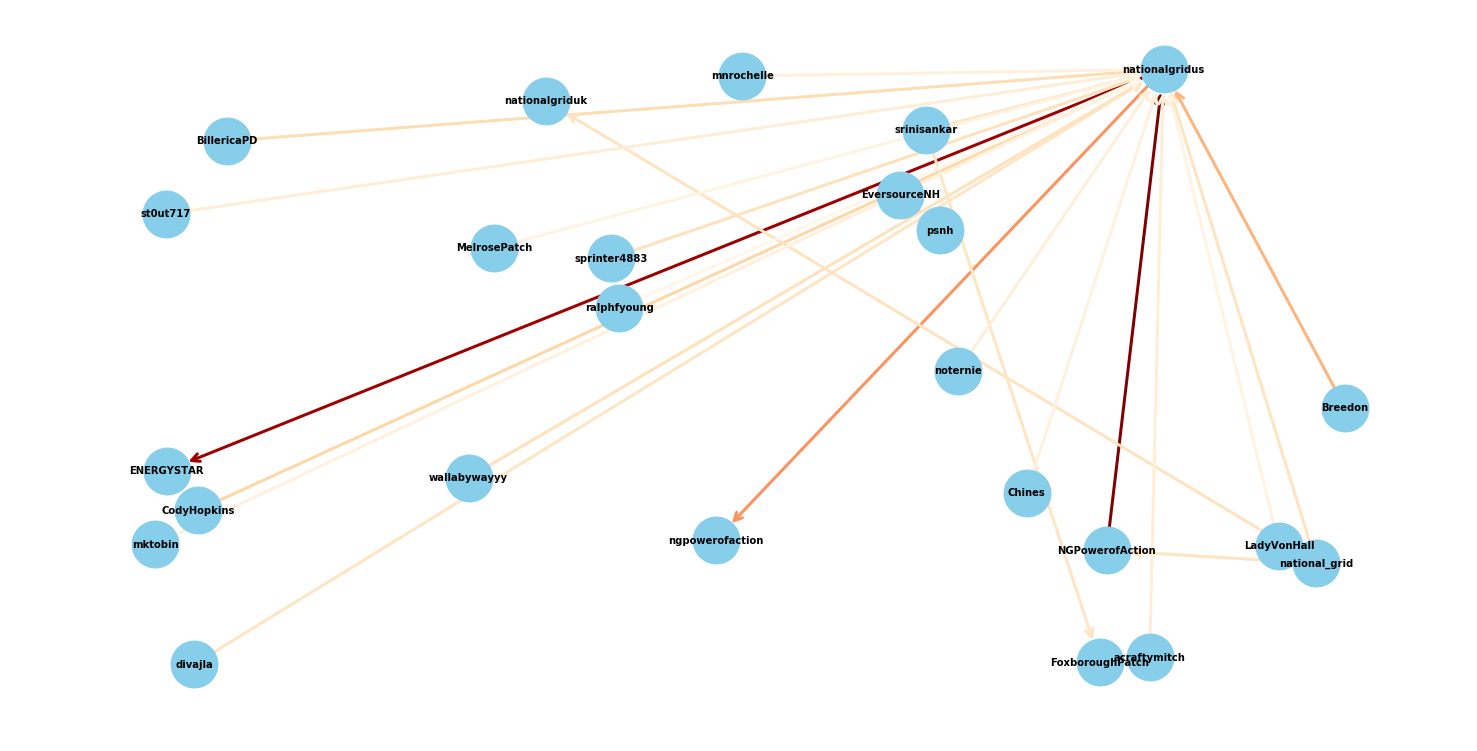

In [37]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
 
plt.figure(figsize=(20,10))
# Build your graph
G=nx.from_pandas_edgelist(final_net.head(25), 'from', 'to', create_using=nx.DiGraph() )

# Custom the nodes:
nx.draw(G, with_labels=True, 
        node_color='skyblue', node_size=2200, 
        edge_color=final_net.head(25)['count'], width=3, edge_cmap=plt.cm.OrRd,
        arrowstyle='->',arrowsize=20,
        font_size=10, font_weight="bold",
        pos=nx.random_layout(G, seed=13))
        #pos=nx.shell_layout(G),)

# Graph using Bokeh

In this context, Bokeh might provide us better and more interactive graphs. That's why I will try to implement the network analysis inside Bokeh package, which will make the visualization much more interactive.

In [38]:
import networkx as nx

from bokeh.io import show, output_file
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, BoxZoomTool, ResetTool
from bokeh.models.graphs import from_networkx
from bokeh.palettes import Spectral4

In [39]:
# Prepare Data
G=nx.from_pandas_edgelist(final_net.head(25), 'from', 'to', create_using=nx.DiGraph() )

In [40]:
list(G.edges)

[('NGPowerofAction', 'nationalgridus'),
 ('nationalgridus', 'ENERGYSTAR'),
 ('nationalgridus', 'nationalgridus'),
 ('nationalgridus', 'ngpowerofaction'),
 ('Breedon', 'nationalgridus'),
 ('EversourceNH', 'psnh'),
 ('CodyHopkins', 'nationalgridus'),
 ('BillericaPD', 'nationalgridus'),
 ('sprinter4883', 'nationalgridus'),
 ('wallabywayyy', 'nationalgridus'),
 ('national_grid', 'nationalgriduk'),
 ('national_grid', 'nationalgridus'),
 ('national_grid', 'NGPowerofAction'),
 ('divajla', 'nationalgridus'),
 ('srinisankar', 'nationalgridus'),
 ('srinisankar', 'FoxboroughPatch'),
 ('st0ut717', 'nationalgridus'),
 ('acraftymitch', 'nationalgridus'),
 ('noternie', 'nationalgridus'),
 ('mnrochelle', 'nationalgridus'),
 ('mktobin', 'nationalgridus'),
 ('Chines', 'nationalgridus'),
 ('MelrosePatch', 'nationalgridus'),
 ('LadyVonHall', 'nationalgridus'),
 ('ralphfyoung', 'nationalgridus')]

In [41]:
# to assign different colors to different bins, we created 5 bins.
# The darkest is for the most frequent edge and lighter means less traffic.
deg1, deg2, deg3, deg4, deg5 = '#8B4513', '#A0522D', '#CD853F', '#DEB887', '#FFE4B5'
edge_attrs = {}

In [42]:
edge_attrs

{}

In [43]:
for start_node, end_node, _ in G.edges(data=True):
    
    # created a mask for data frame. Essential to filter out the rows we need.
    mask = int(final_net[(final_net['from'] == start_node) & (final_net['to'] == end_node)]['count'])

    # Assigned corresponding colors to each one of the nodes
    if int(mask) > 50 :
        edge_color = deg1
    elif (int(mask) <= 50) & (int(mask) > 40):
        edge_color = deg2
    elif (int(mask) <= 40) & (int(mask) > 34):
        edge_color = deg3
    elif (int(mask) <= 34) & (int(mask) > 28):
        edge_color = deg4
    else: 
        edge_color = deg5
    
    edge_attrs[(start_node, end_node)] = edge_color # assign the colors to the nodes.

In [44]:
nx.set_edge_attributes(G, edge_attrs, "edge_color")

 - bipartite_layout(G, nodes[, align, scale, …])
 - circular_layout(G[, scale, center, dim])
 - kamada_kawai_layout(G[, dist, pos, weight, …])
 - random_layout(G[, center, dim, seed])
 - rescale_layout(pos[, scale])
 - shell_layout(G[, nlist, scale, center, dim])
 - spring_layout(G[, k, pos, fixed, …])
 - spectral_layout(G[, weight, scale, center, dim])

In [45]:
# Show with Bokeh
plot = Plot(plot_width=400, plot_height=400,
            x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))
plot.title.text = "Graph Interaction Demonstration"

node_hover_tool = HoverTool(tooltips=[("Node", "@index")])
plot.add_tools(node_hover_tool, BoxZoomTool(), ResetTool())

# Listed all the necessary layout options that might match our visual preferences: 
# graph_renderer = from_networkx(G, nx.circular_layout, scale=1, center=(0, 0))
# graph_renderer = from_networkx(G, nx.random_layout, center = (-0.5,-0.5))
graph_renderer = from_networkx(G, nx.shell_layout,  center=(0, 0))
# graph_renderer = from_networkx(G, nx.spring_layout, scale=1, center=(0, 0))

graph_renderer.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
graph_renderer.edge_renderer.glyph = MultiLine(line_color="edge_color", line_alpha=0.8, line_width=2)
plot.renderers.append(graph_renderer)

output_file("interactive_graphs.html")
show(plot)

# Active Accounts Only During Outage

In [46]:
# filter out only the rows where outage is equal to 0.
# In other words, the rows that only happened during an outage
tweets_sub0 = tweets[['timestamp','id','from','to','outage']].dropna()
tweets_sub0 = tweets_sub0[tweets_sub0['outage'] == 0]

In [47]:
tweets_sub0.head()

,timestamp,id,from,to,outage
738,2012-11-12 22:18:22,268115548313890817,Jackie500,[nationalgridus:],0
739,2012-11-12 22:17:57,268115443645030400,Jackie500,[nationalgridus:],0
741,2012-11-12 21:42:45,268106584675213312,NYDNPolitics,"[NYCBuildings, nationalgridus]",0
743,2012-11-12 21:10:10,268098383732932608,UnitedWayMABay,"[Gillette, NationalGridUS, BostonFed]",0
744,2012-11-12 21:07:17,268097660639141888,UnitedWayMABay,"[Gillette, NationalGridUS, BostonFed]",0


In [48]:
# A new data frame is created under the name of network. This data frame displays each 
# interaction between the nodes but there are duplicates.
network0 = tweets_sub0.set_index('from').to.apply(pd.Series).stack().reset_index(level=0).rename(columns={0:'to'})

In [49]:
# If there is any empty cell, we replaced them with np.nan so that the na's can be dropped.
network0['from'] = network0['from'].map(lambda cell: np.nan if cell == '' else cell)
network0['to'] = network0['to'].map(lambda cell: np.nan if cell == '' else cell)

In [50]:
network0.isnull().sum()

from      0
to      427
dtype: int64

In [51]:
network0.dropna(inplace = True)

In [52]:
network0.head(10)

,from,to
0,Jackie500,nationalgridus:
0,Jackie500,nationalgridus:
0,NYDNPolitics,NYCBuildings
1,NYDNPolitics,nationalgridus
0,UnitedWayMABay,Gillette
1,UnitedWayMABay,NationalGridUS
2,UnitedWayMABay,BostonFed
0,UnitedWayMABay,Gillette
1,UnitedWayMABay,NationalGridUS
2,UnitedWayMABay,BostonFed


In [53]:
# Another issue was the punctuations. For instance there are rows like 'nationalgrid:'
# This examples increase the number of nodes although it is an existing node which is referred.
network0['from'] = network0['from'].str.replace(r'[^\w\s]+', '')
network0['to'] = network0['to'].str.replace(r'[^\w\s]+', '')
network0.reset_index(inplace = True, drop= True)

In [54]:
network0.head()

,from,to
0,Jackie500,nationalgridus
1,Jackie500,nationalgridus
2,NYDNPolitics,NYCBuildings
3,NYDNPolitics,nationalgridus
4,UnitedWayMABay,Gillette


In [55]:
network0['to'] = network0['to'].map(lambda cell: np.nan if cell == '' else cell)

In [56]:
network0.dropna(inplace = True)

In [57]:
network0.head()

,from,to
0,Jackie500,nationalgridus
1,Jackie500,nationalgridus
2,NYDNPolitics,NYCBuildings
3,NYDNPolitics,nationalgridus
4,UnitedWayMABay,Gillette


In [58]:
# In order to visualize the dataframe easier, I ordered the columns alphabetically
network0.sort_values(by = ['from'], inplace = True)

In [59]:
network0.sort_values(by = ['to'], inplace = True)

In [60]:
# reset the index
network0.reset_index(inplace=True, drop=True)

In [61]:
network0.head()

,from,to
0,limnrix,0157
1,lizamoskowitz,100BayState
2,NathanSpencer,1033WODS
3,spotlightgear,12Vspotlight
4,FinaleSnG,12marauder11553


In [62]:
len(network0)

11954

In [63]:
len(network0.drop_duplicates())

7816

In [64]:
final_net0 = network0.groupby(network0.columns.tolist()).size().reset_index().rename(columns={0:'count'})

In [65]:
final_net0 = final_net0.sort_values(by=('count'), ascending=False).reset_index(drop=True)

In [66]:
final_net0.head(25)

,from,to,count
0,NGPowerofAction,nationalgridus,209
1,nationalgridus,nationalgridus,104
2,nationalgridus,ENERGYSTAR,104
3,Andruzzi63,nationalgridus,86
4,national_grid,nationalgriduk,76
5,national_grid,nationalgridus,76
6,joeandruzzifndn,nationalgridus,72
7,national_grid,NGPowerofAction,64
8,nationalgridus,ToSaveEnergy,60
9,nationalgridus,CityYear,54


In [67]:
# Just for the sake of simplicity, I will only include the interactions that happened more than once in both
final_net = final_net[final_net['count'] > 5]
final_net0 = final_net0[final_net0['count'] > 5]

In [68]:
int_lst = []
for i in range(0,len(final_net0)):

    for j in range(0, len(final_net)):
        some_lst = []
        
        if final_net0['from'][i] == final_net['from'][j]:
            if final_net0['to'][i] == final_net['to'][j]:
                
                dif = int(final_net['count'][i]) - int(final_net0['count'][i])
                
                some_lst.append(final_net0['from'][i])
                some_lst.append(final_net0['to'][i])
                some_lst.append(dif)
                int_lst.append(some_lst)
            else:
                continue
        else:
            continue
                

In [69]:
len(int_lst)

47

In [70]:
first_to = []
second_from = []
third_cnt = []
for i in range(0,len(int_lst)):
    first_to.append(int_lst[i][0])
    second_from.append(int_lst[i][1])
    third_cnt.append(int_lst[i][2])

In [71]:
df = pd.DataFrame([])
df['from'] = pd.Series(first_to)
df['to'] = pd.Series(second_from)
df['count'] = pd.Series(third_cnt)
df = df.sort_values(by='count', ascending = False)
df.reset_index(inplace=True, drop=True)
df.head()

,from,to,count
0,nationalgridus,BNMC,5
1,HarderServices,nationalgridus,5
2,AndreaWBZ,nationalgridus,5
3,WestfordPatch,nationalgridus,5
4,EversourceNH,kdpaine,5


    
# Directed Graph


Draw a graph with directed edges using a colormap and different node sizes.

Edges have different colors and alphas (opacity). Drawn using matplotlib.



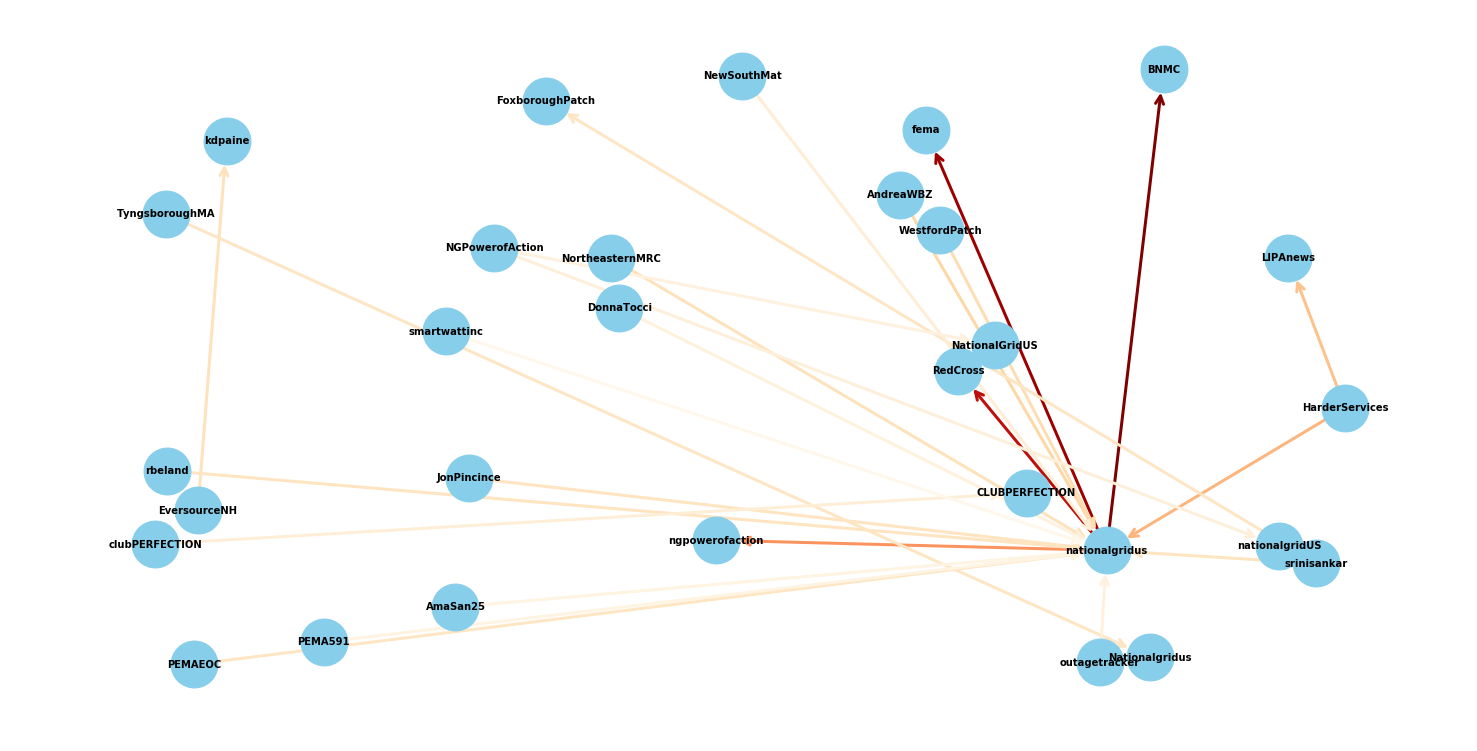

In [72]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
 
plt.figure(figsize=(20,10))
# Build your graph
G=nx.from_pandas_edgelist(df.head(25), 'from', 'to', create_using=nx.DiGraph() )

# Custom the nodes:
nx.draw(G, with_labels=True, 
        node_color='skyblue', node_size=2200, 
        edge_color=final_net.head(25)['count'], width=3, edge_cmap=plt.cm.OrRd,
        arrowstyle='->',arrowsize=20,
        font_size=10, font_weight="bold",
        pos=nx.random_layout(G, seed=13))
        #pos=nx.shell_layout(G),)

# Graph using Bokeh

In [73]:
import networkx as nx

from bokeh.io import show, output_file
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, BoxZoomTool, ResetTool
from bokeh.models.graphs import from_networkx
from bokeh.palettes import Spectral4

In [74]:
# Prepare Data
G=nx.from_pandas_edgelist(df.head(25), 'from', 'to', create_using=nx.DiGraph() )

In [75]:
list(G.edges)

[('nationalgridus', 'BNMC'),
 ('nationalgridus', 'fema'),
 ('nationalgridus', 'RedCross'),
 ('nationalgridus', 'ngpowerofaction'),
 ('HarderServices', 'nationalgridus'),
 ('HarderServices', 'LIPAnews'),
 ('AndreaWBZ', 'nationalgridus'),
 ('WestfordPatch', 'nationalgridus'),
 ('EversourceNH', 'kdpaine'),
 ('NortheasternMRC', 'nationalgridus'),
 ('JonPincince', 'nationalgridus'),
 ('rbeland', 'nationalgridus'),
 ('srinisankar', 'nationalgridus'),
 ('srinisankar', 'FoxboroughPatch'),
 ('PEMAEOC', 'nationalgridus'),
 ('TyngsboroughMA', 'Nationalgridus'),
 ('NewSouthMat', 'nationalgridus'),
 ('clubPERFECTION', 'CLUBPERFECTION'),
 ('NGPowerofAction', 'nationalgridUS'),
 ('NGPowerofAction', 'NationalGridUS'),
 ('DonnaTocci', 'nationalgridus'),
 ('outagetracker', 'nationalgridus'),
 ('PEMA591', 'nationalgridus'),
 ('AmaSan25', 'nationalgridus'),
 ('smartwattinc', 'nationalgridus')]

In [76]:
df

,from,to,count
0,nationalgridus,BNMC,5
1,HarderServices,nationalgridus,5
2,AndreaWBZ,nationalgridus,5
3,WestfordPatch,nationalgridus,5
4,EversourceNH,kdpaine,5
5,NortheasternMRC,nationalgridus,5
6,JonPincince,nationalgridus,4
7,rbeland,nationalgridus,4
8,srinisankar,nationalgridus,4
9,srinisankar,FoxboroughPatch,4


In [77]:
# to assign different colors to different bins, we created 4 bins.
# The darkest is for the most frequent edge and lighter means less traffic.
deg1, deg2, deg3, deg4 = '#8B4513', '#A0522D', '#CD853F', '#DEB887'
edge_attrs = {}

In [78]:
edge_attrs

{}

In [79]:
for start_node, end_node, _ in G.edges(data=True):
    
    # created a mask for data frame. Essential to filter out the rows we need.
    mask = int(final_net[(final_net['from'] == start_node) & (final_net['to'] == end_node)]['count'])

    # Assigned corresponding colors to each one of the nodes
    if int(mask) == 5 :
        edge_color = deg1
    elif (int(mask) == 4):
        edge_color = deg2
    elif (int(mask) == 3):
        edge_color = deg3
    else: 
        edge_color = deg4
    
    edge_attrs[(start_node, end_node)] = edge_color # assign the colors to the nodes.

In [80]:
nx.set_edge_attributes(G, edge_attrs, "edge_color")

 - bipartite_layout(G, nodes[, align, scale, …])
 - circular_layout(G[, scale, center, dim])
 - kamada_kawai_layout(G[, dist, pos, weight, …])
 - random_layout(G[, center, dim, seed])
 - rescale_layout(pos[, scale])
 - shell_layout(G[, nlist, scale, center, dim])
 - spring_layout(G[, k, pos, fixed, …])
 - spectral_layout(G[, weight, scale, center, dim])

In [81]:
# Show with Bokeh
plot = Plot(plot_width=400, plot_height=400,
            x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))
plot.title.text = "Graph Interaction Demonstration"

node_hover_tool = HoverTool(tooltips=[("Node", "@index")])
plot.add_tools(node_hover_tool, BoxZoomTool(), ResetTool())

# Listed all the necessary layout options that might match our visual preferences: 
# graph_renderer = from_networkx(G, nx.circular_layout, scale=1, center=(0, 0))
# graph_renderer = from_networkx(G, nx.random_layout, center = (-0.5,-0.5))
graph_renderer = from_networkx(G, nx.shell_layout,  center=(0, 0))
# graph_renderer = from_networkx(G, nx.spring_layout, scale=1, center=(0, 0))

graph_renderer.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
graph_renderer.edge_renderer.glyph = MultiLine(line_color="edge_color", line_alpha=0.8, line_width=2)
plot.renderers.append(graph_renderer)

output_file("interactive_graphs.html")
show(plot)